# 1.Active Learning Using Support Vector Machines

### Banknote authentication Data - Binary Classification Problem

###### There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy  
import scikits.bootstrap as bootstrap
import statsmodels.stats.api as sms
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import pandas as pd
from ggplot import *
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import variation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from statistics import mean
from sklearn.model_selection import StratifiedShuffleSplit


%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\python27\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in 

#### #Reading dataset file

In [2]:
r_cols = ['variance', 'skewness', 'curtosis','entropy','class']
banknote_data = pd.read_csv('dataset.txt', sep=',', header=None,names=r_cols)
print banknote_data.shape
display (banknote_data.head())
print type(banknote_data)

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<class 'pandas.core.frame.DataFrame'>


#### Check for missing data

In [3]:
banknote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


###### So, the dataset has a total of 1372 data points and no missing data points.

##### check the number of features for each class in the training set

In [4]:
pd.value_counts(banknote_data['class'], sort=True)

0    762
1    610
Name: class, dtype: int64

###### We have an almost equal split of the classes in the training set which is ok for the prediction task.

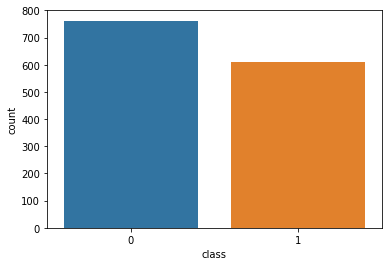

In [5]:
sns.countplot(x='class', data=banknote_data)
plt.savefig('countplot', dpi=300)

### Pairplot

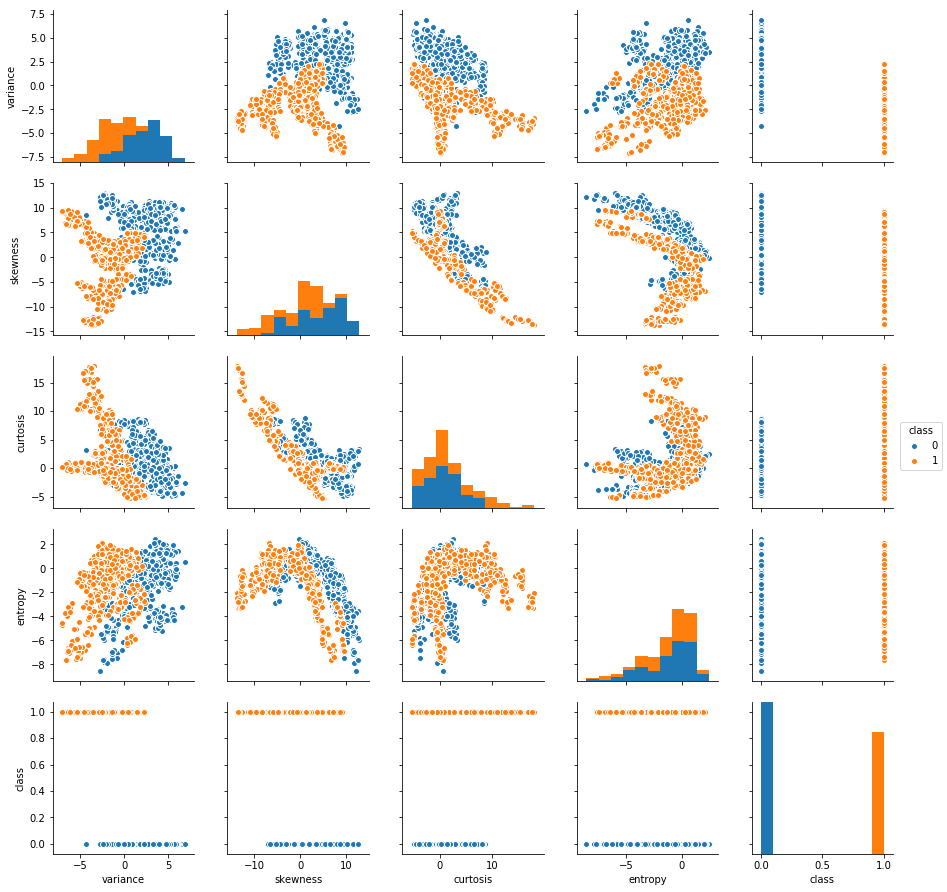

In [6]:
sns.pairplot(data=banknote_data, hue='class')
plt.savefig('pairplot', dpi=300)

#### Variance vs Class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015FFB5F8>,
      dtype=object)

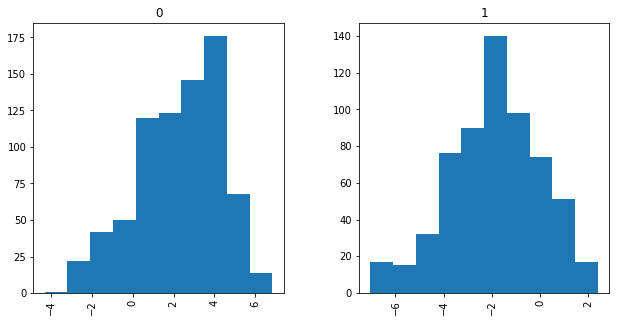

In [7]:
banknote_data.hist(column='variance', by='class', figsize=(10,5))

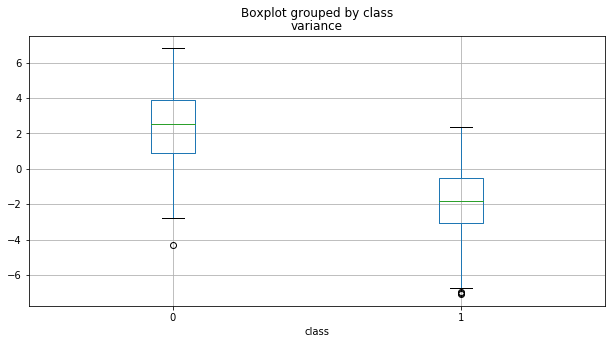

In [8]:
banknote_data.boxplot(column='variance', by='class', figsize=(10,5))

### Skewness vs Class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A4B4550>,
      dtype=object)

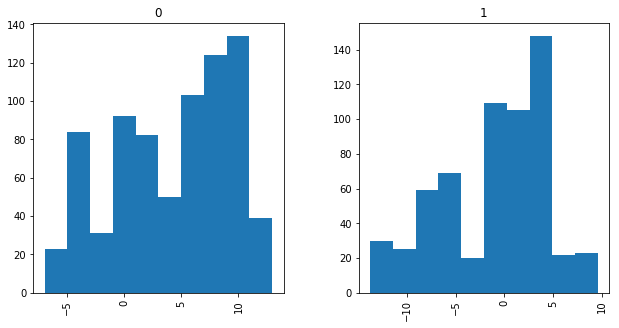

In [9]:
banknote_data.hist(column='skewness', by='class', figsize=(10,5))

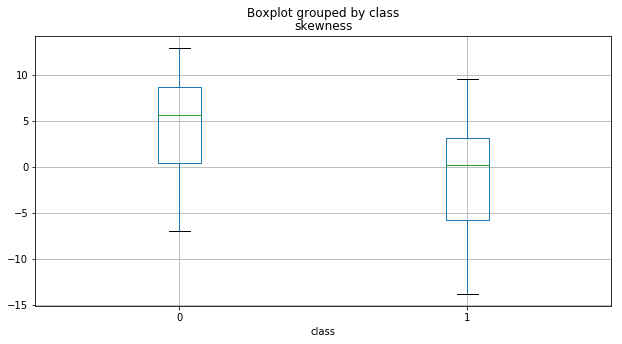

In [10]:
banknote_data.boxplot(column='skewness', by='class', figsize=(10,5))

### Curtosis vs Class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AAFE9E8>,
      dtype=object)

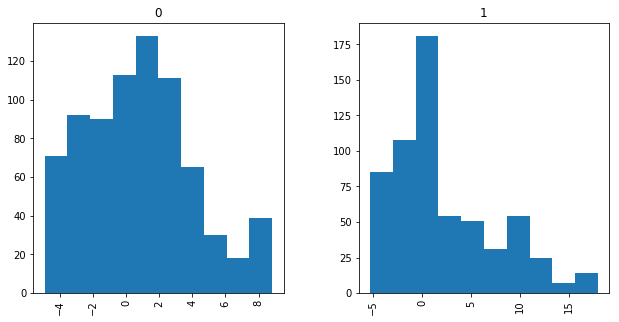

In [11]:
banknote_data.hist(column='curtosis', by='class', figsize=(10,5))

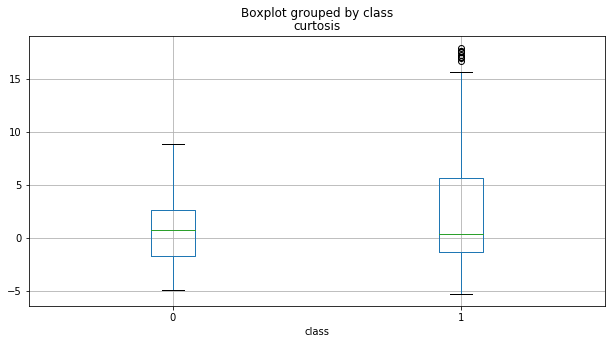

In [12]:
banknote_data.boxplot(column='curtosis', by='class', figsize=(10,5))

### Entropy vs Class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B43EC50>,
      dtype=object)

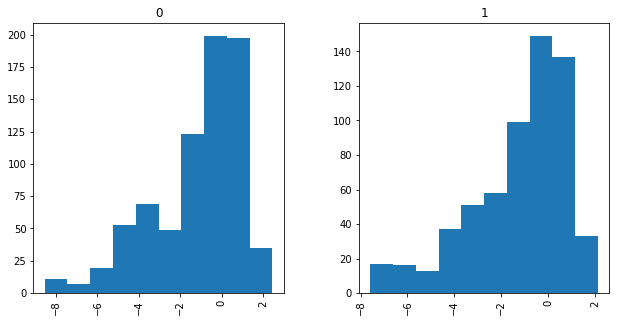

In [13]:

banknote_data.hist(column='entropy', by='class', figsize=(10,5))

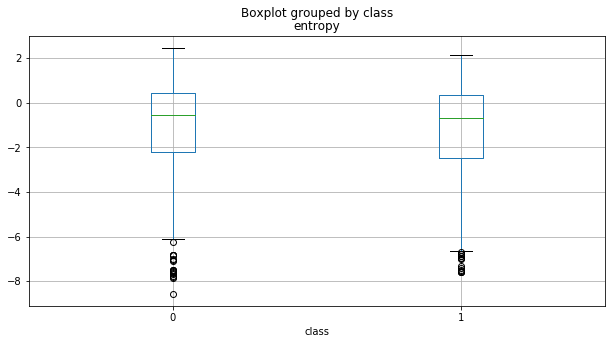

In [14]:
banknote_data.boxplot(column='entropy', by='class', figsize=(10,5))

####  The entropy feature has no differences between then two classes. It has the same mean and median, the same variance and the same distribution. In will not be taken into account for the classification task.

#### Check the correlation between the features and the label

In [15]:
banknote_data.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BDF8A20>,
      dtype=object)

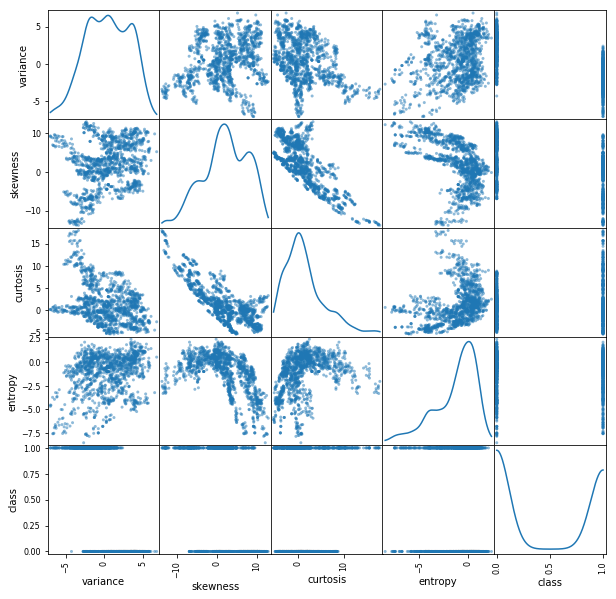

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(banknote_data, figsize=(10, 10), diagonal='kde')

In [17]:
# Count the number of Original and Fake Notes
# Original: Class = 1
# Fake: Class = 0

num_classOriginal = banknote_data['class'][banknote_data['class'] == 1].count()
num_classFake = banknote_data['class'][banknote_data['class'] == 0].count()
total = len(banknote_data)

print('Number of Original Bank Notes: ',num_classOriginal)
print('Number of Fake Bank Notes: ',num_classFake)
print('Total number of Notes: ',total)

('Number of Original Bank Notes: ', 610)
('Number of Fake Bank Notes: ', 762)
('Total number of Notes: ', 1372)


In [18]:
# Data Mean
data_mean = banknote_data.groupby('class').mean()
print('Mean: \n',data_mean)

print('\n')

# Data Variance
data_variance = banknote_data.groupby('class').var()
print('Variance: \n',data_variance)

('Mean: \n',        variance  skewness  curtosis   entropy
class                                        
0      2.276686  4.256627  0.796718 -1.147640
1     -1.868443 -0.993576  2.148271 -1.246641)


('Variance: \n',        variance   skewness   curtosis   entropy
class                                          
0      4.077767  26.407184  10.496912  4.515952
1      3.538848  29.212768  27.686654  4.288974)


#### Choosing 472 data points randomly as the test set.

In [19]:
bn_test = banknote_data.sample(n=472,replace=False)
display (bn_test.head())
print bn_test.shape
#display (bn_test)

,variance,skewness,curtosis,entropy,class
882,-4.387600,-7.7267,11.96550,-1.45430,1
266,-0.016103,9.7484,0.15394,-1.61340,0
1038,-0.708670,-5.5602,4.04830,0.90300,1
304,2.372900,10.4726,-3.00870,-3.20130,0
1289,-1.409400,-2.1252,-0.10397,-0.19225,1


(472, 5)


# Training Dataset has 900 records

In [20]:
bn_train = banknote_data[~banknote_data.index.isin(bn_test.index)]
display (bn_train.head())
print bn_train.shape

,variance,skewness,curtosis,entropy,class
2,3.86600,-2.6383,1.92420,0.10645,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
9,1.53560,9.1772,-2.27180,-0.73535,0


(900, 5)


## 1.b.i 50 errors for 90 SVMs 

In [21]:
from sklearn.model_selection import KFold
bn_train_new=pd.DataFrame()
test_error_total_passive = []
for i in range(0,5):#50 times
    test_error_passive = []
    best_penality_parameter_passive = []
    for j in range(0,9):#90 times
        
        bn_train_extracted = bn_train.sample(n=10,replace=False)
        bn_train_new =pd.concat([bn_train_new, bn_train_extracted], axis=0)
        
        X_train = bn_train_new.drop('class', axis=1)
        Y_train1 = bn_train_new['class']
        Y_train = Y_train1.to_frame();
        
        x_test = bn_test.drop('class', axis=1)
        y_test1 = bn_test['class']
        y_test = y_test1.to_frame();
        
        C_range = np.logspace(-2,3,4)
        #C_range = np.linspace(1.0, 10.0, num=5)
        parameters_grid = dict(C=C_range)
        svc = svm.LinearSVC(penalty='l1',dual=False)
        cv=KFold(10)
        #cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
        clf = GridSearchCV(svc,param_grid=parameters_grid,cv=cv,n_jobs=1)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(x_test)
        score = round(clf.score(x_test, y_test),3)
        
        best_penality_parameter_passive.append(clf.best_params_)
        test_error_passive.append(score)
    print test_error_passive
    
    test_error_total_passive.append(test_error_passive)   
    #print test_error_a
    best_penality_parameter_passive
print test_error_total_passive
print "BEST PARAMETS ARE: "
print best_penality_parameter_passive 

c:\python27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.809, 0.96, 0.949, 0.983, 0.983, 0.983, 0.992, 0.987, 0.996]
[0.996, 0.996, 0.996, 0.992, 0.989, 0.989, 0.992, 0.992, 0.992]
[0.989, 0.989, 0.983, 0.981, 0.987, 0.994, 0.994, 0.992, 0.994]
[0.994, 0.981, 0.987, 0.985, 0.985, 0.981, 0.981, 0.981, 0.981]
[0.981, 0.981, 0.981, 0.981, 0.992, 0.992, 0.992, 0.987, 0.996]
[[0.809, 0.96, 0.949, 0.983, 0.983, 0.983, 0.992, 0.987, 0.996], [0.996, 0.996, 0.996, 0.992, 0.989, 0.989, 0.992, 0.992, 0.992], [0.989, 0.989, 0.983, 0.981, 0.987, 0.994, 0.994, 0.992, 0.994], [0.994, 0.981, 0.987, 0.985, 0.985, 0.981, 0.981, 0.981, 0.981], [0.981, 0.981, 0.981, 0.981, 0.992, 0.992, 0.992, 0.987, 0.996]]
BEST PARAMETS ARE: 
[{'C': 21.544346900318846}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 21.544346900318846}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 21.544346900318846}, {'C': 0.464158883361278}]


### Computation Issue :I have changed the outer loop from 50 to 5 and the inner loop from 90 to 9,since this code was taking more than 15hrs to run on my laptop. So replacing the values 5 to 50 and 9 to 90 would satisfy the requirement. 

In [22]:
print "Passive Leaning 90 test-errors"
print test_error_total_passive

print "BEST PARAMETS ARE: "
print best_penality_parameter_passive 

Passive Leaning 90 test-errors
[[0.809, 0.96, 0.949, 0.983, 0.983, 0.983, 0.992, 0.987, 0.996], [0.996, 0.996, 0.996, 0.992, 0.989, 0.989, 0.992, 0.992, 0.992], [0.989, 0.989, 0.983, 0.981, 0.987, 0.994, 0.994, 0.992, 0.994], [0.994, 0.981, 0.987, 0.985, 0.985, 0.981, 0.981, 0.981, 0.981], [0.981, 0.981, 0.981, 0.981, 0.992, 0.992, 0.992, 0.987, 0.996]]
BEST PARAMETS ARE: 
[{'C': 21.544346900318846}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 21.544346900318846}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 21.544346900318846}, {'C': 0.464158883361278}]


### Please refer Report of Detailed Explanation

# 90 svm test errors for passive learning

In [23]:
test_error_total_passive=pd.DataFrame(test_error_total_passive)
display(test_error_total_passive)
test_error_total_passive=test_error_total_passive.mean()
test_error_total_passive= test_error_total_passive.values.tolist()
print test_error_total_passive

,0,1,2,3,4,5,6,7,8
0,0.809,0.960,0.949,0.983,0.983,0.983,0.992,0.987,0.996
1,0.996,0.996,0.996,0.992,0.989,0.989,0.992,0.992,0.992
2,0.989,0.989,0.983,0.981,0.987,0.994,0.994,0.992,0.994
3,0.994,0.981,0.987,0.985,0.985,0.981,0.981,0.981,0.981
4,0.981,0.981,0.981,0.981,0.992,0.992,0.992,0.987,0.996


[0.9538, 0.9814, 0.9792, 0.9843999999999999, 0.9872, 0.9878, 0.9902, 0.9878, 0.9917999999999999]


## Fitting SVM for 900 train and 472 test data

In [24]:
X_train_full = bn_train.drop('class', axis=1)
Y_train1 = bn_train['class']
Y_train_full = Y_train1.to_frame();


x_test_full = bn_test.drop('class', axis=1)
y_test1 = bn_test['class']
y_test_full = y_test1.to_frame();



In [25]:
clf = svm.LinearSVC(penalty='l1',dual=False)
clf.fit(X_train_full, Y_train_full)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
print(clf.coef_)

[[-1.49841446 -0.78817395 -0.98948292 -0.05377738]]


In [27]:
print(clf.intercept_)

[1.48284479]


In [28]:
y_pred = (clf.predict(x_test_full))


In [29]:
confusion_matrix(y_test_full, y_pred)

array([[261,   2],
       [  1, 208]], dtype=int64)

### preparing train data based on the distance from margin

In [30]:
distance_from_margin = clf.decision_function(X_train_full)

distance_from_margin = list(distance_from_margin)
distance_from_margin = [round(i,3) for i in distance_from_margin]

distance_from_margin = map(abs, distance_from_margin)

#print distance_from_margin
sorted_distance = sorted(distance_from_margin)
#print sorted_distance

In [31]:
dist_df = pd.DataFrame(data = distance_from_margin , columns=['distance'])

In [32]:
X_train_full.reset_index(drop=True, inplace=True)
Y_train_full.reset_index(drop=True, inplace=True)
dist_df.reset_index(drop=True, inplace=True)


In [33]:
X_train_new = pd.concat([X_train_full,Y_train_full,dist_df], axis=1,)
display(X_train_new.head())

,variance,skewness,curtosis,entropy,class,distance
0,3.86600,-2.6383,1.92420,0.10645,0,4.140
1,0.32924,-4.4552,4.57180,-0.98880,0,0.030
2,4.36840,9.6718,-3.96060,-3.16250,0,8.597
3,3.59120,3.0129,0.72888,0.56421,0,7.025
4,1.53560,9.1772,-2.27180,-0.73535,0,5.764


In [34]:
X_train_dist = X_train_new.sort_values(['distance'], ascending=[1])
display (X_train_dist.head())
print X_train_dist.shape

,variance,skewness,curtosis,entropy,class,distance
196,0.32920,-4.4552,4.5718,-0.9888,0,0.03
1,0.32924,-4.4552,4.5718,-0.9888,0,0.03
234,0.32920,-4.4552,4.5718,-0.9888,0,0.03
14,0.32920,-4.4552,4.5718,-0.9888,0,0.03
206,0.32920,-4.4552,4.5718,-0.9888,0,0.03


(900, 6)


In [35]:
X_train_sorted = X_train_dist.drop('distance', axis=1)

## Fit SVM using 10 Closest datata points to the Margin

In [36]:
bn_train_10 = X_train_sorted.sample(n=10,replace=False)
bn_train_rem = X_train_sorted[~X_train_sorted.index.isin(bn_train_10.index)]
print len(bn_train_10),len(bn_train_rem)


10 890


### Computation Issue :I have changed the outer loop from 50 to 5 and the inner loop from 90 to 9,since this code was taking more than 15hrs to run on my laptop. So replacing the values 5 to 50 and 9 to 90 would satisfy the requirement. 

In [37]:
from sklearn.model_selection import KFold
bn_train_new=pd.DataFrame()
test_error_total_active = []
bn_train_extracted = bn_train_10
for i in range(0,5):#50 times
    test_error_active = []
    best_penality_parameter_active = []
    for j in range(1,10):#90 times
        
        bn_train_new =pd.concat([bn_train_new, bn_train_extracted], axis=0)
        
        X_train = bn_train_new.drop('class', axis=1)
        Y_train1 = bn_train_new['class']
        Y_train = Y_train1.to_frame();
        
        x_test = bn_test.drop('class', axis=1)
        y_test1 = bn_test['class']
        y_test = y_test1.to_frame();
        
        C_range = np.logspace(-2,3,4)
        #C_range = np.linspace(1.0, 3.0, num=4)
        parameters_grid = dict(C=C_range)
        svc = svm.LinearSVC(penalty='l1',dual=False)
        cv=KFold(10)
        #cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
        clf = GridSearchCV(svc,param_grid=parameters_grid,cv=cv,n_jobs=1)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(x_test)
        score = round(clf.score(x_test, y_test),3)
        
        best_penality_parameter_active.append(clf.best_params_)
        test_error_active.append(score)
        
        bn_train_extracted = bn_train_rem.iloc[:10,:]
        bn_train_rem=bn_train_rem.drop(bn_train_rem.index[:10])
        
    #print test_error_active
    test_error_total_active.append(test_error_active)   
    #print test_error_a
    
    #print test_error_total_active
print test_error_total_active
print "BEST PARAMETS ARE: "
print best_penality_parameter_active
 

[[0.97, 0.905, 0.975, 0.97, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994]]
BEST PARAMETS ARE: 
[{'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}]


In [38]:
print "Active Leaning 90 test-errors"
print test_error_total_active

print "BEST PARAMETS ARE: "
print best_penality_parameter_active 

Active Leaning 90 test-errors
[[0.97, 0.905, 0.975, 0.97, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994]]
BEST PARAMETS ARE: 
[{'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}, {'C': 0.464158883361278}]


# 90 svm test errors for active learning

In [39]:
test_error_total_active=pd.DataFrame(test_error_total_active)
display(test_error_total_active)
test_error_total_active=test_error_total_active.mean()
test_error_total_active= test_error_total_active.values.tolist()
print test_error_total_active


,0,1,2,3,4,5,6,7,8
0,0.970,0.905,0.975,0.970,0.994,0.994,0.994,0.994,0.994
1,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994
2,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994
3,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994
4,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994


[0.9892, 0.9761999999999998, 0.9902, 0.9892, 0.994, 0.994, 0.994, 0.994, 0.994]


In [40]:
length=len(test_error_total_active)
no_of_train_inst = [i*10 for i in range (1,length+1)]
print no_of_train_inst

[10, 20, 30, 40, 50, 60, 70, 80, 90]


## Monte Carlo Simulation

In [41]:
print no_of_train_inst
print test_error_total_active
print test_error_total_passive

[10, 20, 30, 40, 50, 60, 70, 80, 90]
[0.9892, 0.9761999999999998, 0.9902, 0.9892, 0.994, 0.994, 0.994, 0.994, 0.994]
[0.9538, 0.9814, 0.9792, 0.9843999999999999, 0.9872, 0.9878, 0.9902, 0.9878, 0.9917999999999999]


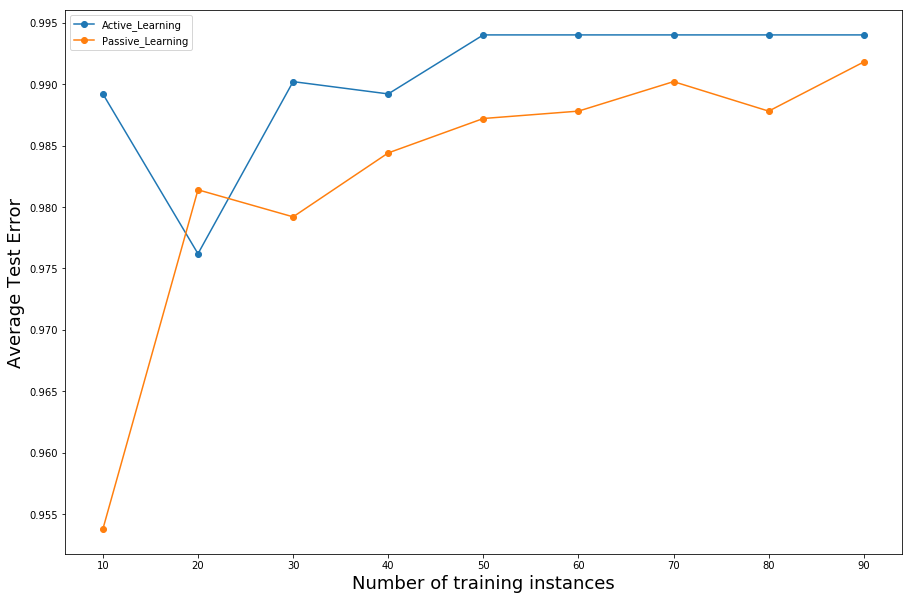

In [42]:
import matplotlib.pyplot as plt
#plt.subplot(2, 1, 1)
plt.figure(figsize=(15,10))
plt.xlabel('Number of training instances', fontsize=18)
plt.ylabel('Average Test Error', fontsize=18)
plt.plot(no_of_train_inst, test_error_total_active,marker='o',label='Active_Learning')
plt.plot(no_of_train_inst, test_error_total_passive,marker='o',label='Passive_Learning')
plt.legend(loc='best')
plt.show()

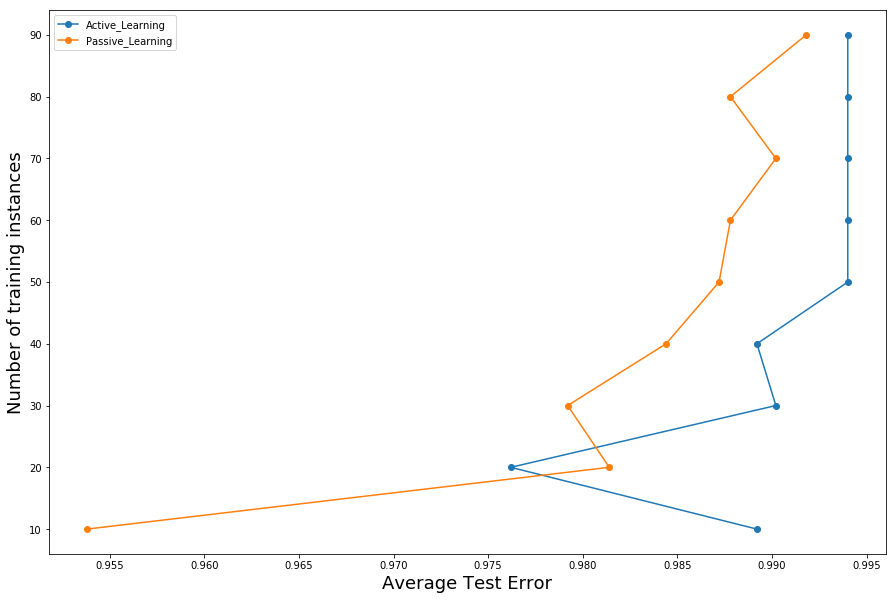

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.ylabel('Number of training instances', fontsize=18)
plt.xlabel('Average Test Error', fontsize=18)
plt.plot(test_error_total_active,no_of_train_inst,marker='o',label='Active_Learning')
plt.plot(test_error_total_passive,no_of_train_inst,marker='o',label='Passive_Learning')
plt.legend(loc='best')
plt.show()

### Conclusion:
### When we plot it for 90 instances we observe that :
### The average test error for active learning procduces lower test errors initially and as the number of instances increases then the average test error for both active and passive converge close to each other